In [181]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from scipy.stats import norm


# CQF Lecture 1 Excercises
### Random Behaviour of Assests

In [182]:
data = os.path.relpath('CQF_Jan_24_M1L1_Excel-1.csv')
df = pd.read_csv(data).set_index('Date')[['Close']]
close = df.copy()
df['1D'] = (close - close.shift(1)) / close.shift(1)
df['2D'] = (close - close.shift(2)) / close.shift(2)
df['5D'] = (close - close.shift(5)) / close.shift(5)

#### Q1.
 Adjust the standard deviation of the 5 and 2 day returns by the square root of time

In [183]:
sigma = df[['1D', '2D', '5D']].std()
sigma


1D    0.011965
2D    0.016796
5D    0.026144
dtype: float64

In [184]:
sigma['5D'] / np.sqrt(5)

0.011691874038996188

In [185]:
sigma['2D'] / np.sqrt(2)

0.011876663783738679

#### Q2.
Reshuffle the data into 2 halves and compute the standard deviation and mean of the each

In [186]:
h1 = close.iloc[1::2]
h1['1D'] = (h1 - h1.shift(1)) / h1.shift(1)

h2 = close.iloc[::2]
h2['1D'] = (h2 - h2.shift(1)) / h2.shift(1)



/tmp/ipykernel_5971/656573242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1['1D'] = (h1 - h1.shift(1)) / h1.shift(1)
/tmp/ipykernel_5971/656573242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2['1D'] = (h2 - h2.shift(1)) / h2.shift(1)


In [187]:
h1.mean()

Close    610.879753
1D         0.000611
dtype: float64

In [188]:
h1.std()

Close    978.756043
1D         0.017036
dtype: float64

In [189]:
h2.mean()

Close    610.683253
1D         0.000602
dtype: float64

In [190]:
h2.std()

Close    978.422023
1D         0.016553
dtype: float64

#### Q3.
Construct QQ plots for 1 day and 5 day returns

Todo - what is a QQ plot?
How do we interpret this

In [203]:
def qq_df(days=1):
    # lets do 1 day returns first
    qq = df[['Close']]
    # Assuming you have a DataFrame named 'df' with a column named 'Close' containing the closing prices
    qq[f'{days}D'] = np.log(qq['Close'] / qq['Close'].shift(days))

    mean_1d = qq[f'{days}D'].mean()
    sigma_1d = qq[f'{days}D'].std()

    Nobs = len(qq)
    qq['Zscore'] = (qq[f'{days}D'] - mean_1d) / sigma_1d
    qq.sort_values('Zscore', inplace=True)
    qq['i'] = range(1, len(qq) + 1)
    qq['i/N'] = qq['i'] / Nobs
    qq['Standard'] = qq['i/N'].apply(norm.ppf)
    qq = qq[1:-1]
    return qq

qq_1d = qq_df(days=1)
qq_5d = qq_df(days=5)

/tmp/ipykernel_5971/2106299707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qq[f'{days}D'] = np.log(qq['Close'] / qq['Close'].shift(days))
/tmp/ipykernel_5971/2106299707.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qq['Zscore'] = (qq[f'{days}D'] - mean_1d) / sigma_1d
/tmp/ipykernel_5971/2106299707.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [204]:
qq_1d

,Close,1D,Zscore,i,i/N,Standard
Date,,,,,,
28/10/1929,22.740000,-0.138576,-11.581281,2,0.000083,-3.766153
16/03/2020,2386.129883,-0.127652,-10.669882,3,0.000124,-3.663622
29/10/1929,20.430000,-0.107121,-8.956899,4,0.000166,-3.589302
16/04/1935,8.220000,-0.104995,-8.779553,5,0.000207,-3.530703
06/11/1929,20.610001,-0.104487,-8.737102,6,0.000249,-3.482181
...,...,...,...,...,...,...
21/09/1932,8.520000,0.111640,9.295103,24123,0.999793,3.530703
05/09/1939,12.640000,0.112064,9.330453,24124,0.999834,3.589302
06/10/1931,9.910000,0.116522,9.702468,24125,0.999876,3.663622


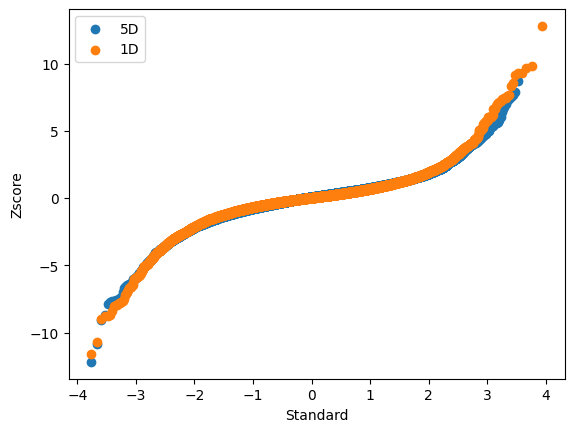

In [211]:
plt.scatter(qq_5d['Standard'], qq_5d['Zscore'], label='5D')
plt.scatter(qq_1d['Standard'], qq_1d['Zscore'], label='1D')
plt.xlabel('Standard')
plt.ylabel('Zscore')
plt.legend()


# Q4 
Construct a histogram over historical returns scaled to z-scores and compare to Normal distribution density

In [213]:
mean_1d = df['1D'].mean()
sigma_1d = df['1D'].std()
df['1DZ'] = (df['1D'] - mean_1d) / sigma_1d

mean_2d = df['5D'].mean()
sigma_2d = df['5D'].std()
df['2DZ'] = (df['5D'] - mean_2d) / sigma_2d

mean_5d = df['5D'].mean()
sigma_5d = df['5D'].std()
df['5DZ'] = (df['5D'] - mean_5d) / sigma_5d

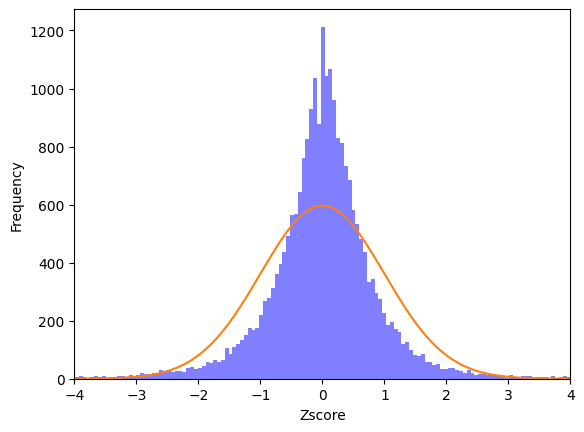

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = df['1DZ'][1:-1]

N = len(data)
num_bins = 500
plt.hist(data, bins=num_bins, facecolor='blue', alpha=0.5)

y = np.linspace(-4, 4, 1000)
bin_width = (data.max() - data.min()) / num_bins
plt.xlim(-4, 4)
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.plot(y, stats.norm.pdf(y) * N * bin_width)

plt.show()